# Kaggle- House prices advanced regression techniques

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

### Load data

In [2]:
train_data = pd.read_csv('c:/logan/Machine learning/kaggle data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('c:/logan/Machine learning/kaggle data/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


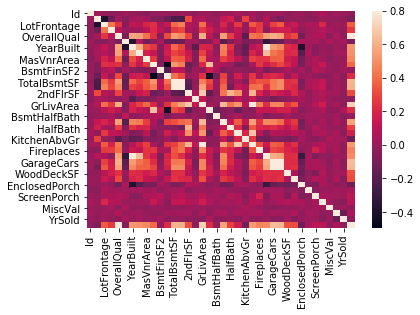

In [5]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix,vmax=.8)

In [6]:
# Sort the correlation to add the preditor one by one.
corr = abs(corr_matrix['SalePrice']).sort_values(ascending=False)
corr = corr.drop('SalePrice')
corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train_data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
feature_train, target = train_data, train_data.pop('SalePrice')

In [11]:
df = pd.concat([feature_train, test_data], sort=False)

In [12]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [13]:
df.reset_index(drop=True, inplace=True) #將合併後的資料index重新排列

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

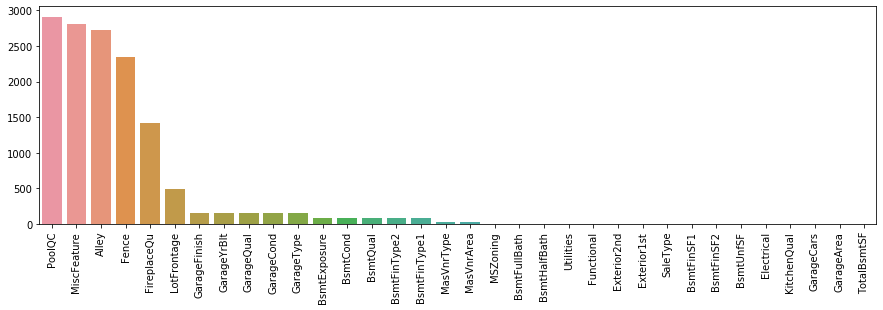

In [14]:
col_null_info = df.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

In [15]:
 df.loc[:,'Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
2914    SBrkr
2915    SBrkr
2916    SBrkr
2917    SBrkr
2918    SBrkr
Name: Electrical, Length: 2919, dtype: object

In [16]:
#df1 = df.drop(["PoolQC", "MiscFeature","Fence", "Alley","MoSold"],axis=1)

In [17]:
df1 = df.copy()

In [18]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [19]:
#Clean Data
df1['MSZoning'] = df1['MSZoning'].fillna('RM')
df1['Utilities'] = df1['Utilities'].fillna('AllPub')
df1['Exterior1st'] = df1['Exterior1st'].fillna('VinylSd')
df1['Exterior2nd'] = df1['Exterior2nd'].fillna('Other')
df1['BsmtFinSF1'] = df1['BsmtFinSF1'].fillna(0)
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna(0)
df1['BsmtUnfSF'] = df1['BsmtUnfSF'].fillna(0)
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(0)
df1['BsmtFullBath'] = df1['BsmtFullBath'].fillna(0)
df1['BsmtHalfBath'] = df1['BsmtHalfBath'].fillna(0)
df1['KitchenQual'] = df1['KitchenQual'].fillna('TA')
df1['Functional'] = df1['Functional'].fillna('Typ')
df1['GarageCars'] = df1['GarageCars'].fillna(0)
df1['GarageArea'] = df1['GarageArea'].fillna(0)
df1['SaleType'] = df1['SaleType'].fillna('Oth')
df1['LotFrontage'] = df1['LotFrontage'].fillna(0)
df1['Alley'] = df1['Alley'].fillna('NA')
df1['MasVnrType'] = df1['MasVnrType'].fillna('None')
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)
df1['BsmtQual'] = df1['BsmtQual'].fillna('NA')
df1['BsmtCond'] = df1['BsmtCond'].fillna('NA')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('NA')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('NA')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('NA')
df1['Electrical'] = df1['Electrical'].fillna('SBrkr')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('No_Fireplace')
df1['GarageType'] = df1['GarageType'].fillna('NA')
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['YrSold'])
df1['GarageFinish'] = df1['GarageFinish'].fillna('NA')
df1['GarageQual'] = df1['GarageQual'].fillna('No_Garage')
df1['GarageCond'] = df1['GarageCond'].fillna('No_Garage')
df1['PoolQC'] = df1['PoolQC'].fillna('No_Pool')
df1['Fence'] = df1['Fence'].fillna('NA')
df1['MiscFeature'] = df1['MiscFeature'].fillna('NA')

In [20]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,NA,NA,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,...,0,0,No_Pool,MnPrv,Shed,700,7,2006,WD,Normal


In [21]:
df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

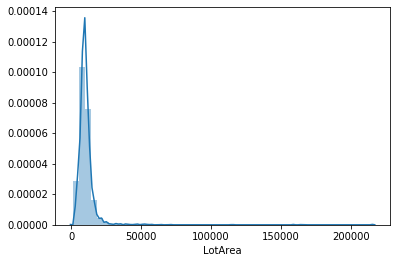

In [22]:
sns.distplot(df1["LotArea"])

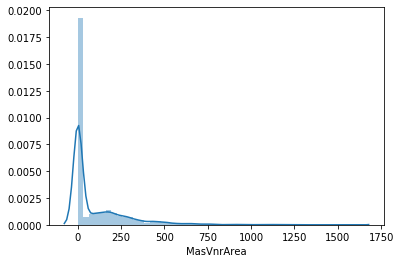

In [23]:
sns.distplot(df1["MasVnrArea"])

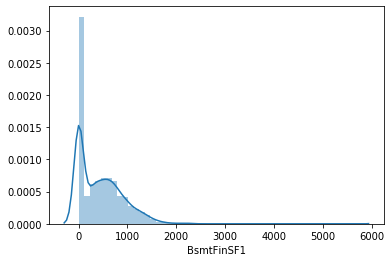

In [24]:
sns.distplot(df1["BsmtFinSF1"])

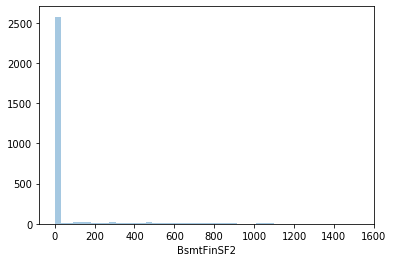

In [25]:
sns.distplot(df1["BsmtFinSF2"],kde=False)

In [26]:
#Numerical columns use log transformation
log1p_col = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','BsmtUnfSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal', 'MasVnrArea']
for col in log1p_col:
    df1[col] = df1[col].apply(np.log1p)

#Calculate the building age and binning the age
df1['Building_age'] = df1['YrSold'] - df1['YearBuilt']
for idx in df1.loc[df1.Building_age<0].index:
    df1.loc[idx, 'Building_age'] = 0
df1['Building_age_class'] = pd.cut(df1['Building_age'], bins=14)
df1['Building_age'] = df1['Building_age'].apply(np.log1p)

#Calculate the age of the house after remodification and binning the age
df1['Remod_age'] = df1['YrSold'] - df1['YearRemodAdd']
df1['Remod_age_class'] = pd.cut(df1['Remod_age'], bins=6)
for idx in df1.loc[df1.Remod_age<0].index:
    df1.loc[idx, 'Remod_age'] = 0
df1['Remod_age'] = df1['Remod_age'].apply(np.log1p)

#Calculate the age of garage and binning the age
df1['GarageYrBlt_age'] = df1['YrSold'] - df1['GarageYrBlt']
df1['GarageYrBlt_age_class'] = pd.cut(df1['GarageYrBlt_age'], bins=10)
for idx in df1.loc[df1.GarageYrBlt_age<0].index:
    df1.loc[idx, 'GarageYrBlt_age'] = 0
df1['GarageYrBlt_age'] = df1['GarageYrBlt_age'].apply(np.log1p)

#Map the quality to different grade
exter_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,'Na':0,
              'No_Fireplace':0, 'No_Garage':0, 'No_Pool':0}
df1['ExterQual'] = df1['ExterQual'].map(exter_qual)
df1['ExterCond'] = df1['ExterCond'].map(exter_qual)
df1['HeatingQC'] = df1['HeatingQC'].map(exter_qual)
df1['KitchenQual'] = df1['KitchenQual'].map(exter_qual)
df1['FireplaceQu'] = df1['FireplaceQu'].map(exter_qual)
df1['GarageQual'] = df1['GarageQual'].map(exter_qual)
df1['GarageCond'] = df1['GarageCond'].map(exter_qual)
df1['PoolQC'] = df1['PoolQC'].map(exter_qual)

#Map the basement quality and condition
bsmt_qual = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
df1['BsmtQual'] = df1['BsmtQual'].map(bsmt_qual)
df1['BsmtCond'] = df1['BsmtCond'].map(bsmt_qual)

#Map the basement exposure
bsmtexposure_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
df1['BsmtExposure'] = df1['BsmtExposure'].map(bsmtexposure_map)

#Map the landslope to different grade
slop_map = {'Gtl':3, 'Mod':2, 'Sev':1}
df1['LandSlope_class'] = df1['LandSlope'].map(slop_map)

#Mape the land contour to different class
landcounter_map = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}
df1['LandContour_class'] = df1['LandContour'].map(landcounter_map)

#Map the utilities to different level
utilities_map = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
df1['Utilities_class'] = df1['Utilities'].map(utilities_map)
df1['Utilities_class'] = df1['Utilities_class'].fillna(4)

#Map the basement finish type to different level
bsmt_FinType = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}
df1['BsmtFinType1'] = df1['BsmtFinType1'].map(bsmt_FinType)
df1['BsmtFinType2'] = df1['BsmtFinType2'].map(bsmt_FinType)


#Map the fence to different level
fence_qual = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
df1['Fence'] = df1['Fence'].map(fence_qual)


#Calculate the sum of condition
condition_map = {'Artery':2, 'Feedr':2, 'Norm':1, 'RRNn':2, 'RRAn':2, 'PosN':2, 'PosA':2, 'RRNe':2, 'RRAe':2}
df1['ConditionSum'] = df1['Condition2'].map(condition_map)

#Map the garage finish situation to different level
finish_map = {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}
df1['GarageFinish_class'] = df1['GarageFinish'].map(finish_map)

#Change column type to object column(use for one hot encoding)
df1['MSSubClass'] = df1['MSSubClass'].astype('object')
df1['BsmtFullBath'] = df1['BsmtFullBath'].astype('object')
df1['BsmtHalfBath'] = df1['BsmtHalfBath'].astype('object')
df1['Fireplaces'] = df1['Fireplaces'].astype('object')
df1['GarageCars'] = df1['GarageCars'].astype('object')
df1['YrSold'] = df1['YrSold'].astype('object')

#Map the month to season
season_map = {1:1,2:1,3:1,
              4:2,5:2,6:2,
              7:3,8:3,9:3,
              10:4,11:4,12:4}
df1['SeasonSold'] = df1['MoSold'].map(season_map)
df1 = df1.drop('MoSold',axis =1)

In [27]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Remod_age,Remod_age_class,GarageYrBlt_age,GarageYrBlt_age_class,LandSlope_class,LandContour_class,Utilities_class,ConditionSum,GarageFinish_class,SeasonSold
0,1,60,RL,4.189655,9.042040,Pave,NA,Reg,Lvl,AllPub,...,1.791759,"(-2.062, 8.333]",1.791759,"(-11.6, 19.8]",3,4,4,1,2,1
1,2,20,RL,4.394449,9.169623,Pave,NA,Reg,Lvl,AllPub,...,3.465736,"(29.0, 39.333]",3.465736,"(19.8, 51.2]",3,4,4,1,2,2
2,3,60,RL,4.234107,9.328212,Pave,NA,IR1,Lvl,AllPub,...,1.945910,"(-2.062, 8.333]",2.079442,"(-11.6, 19.8]",3,4,4,1,2,3
3,4,70,RL,4.110874,9.164401,Pave,NA,IR1,Lvl,AllPub,...,3.610918,"(29.0, 39.333]",2.197225,"(-11.6, 19.8]",3,4,4,1,1,1
4,5,60,RL,4.442651,9.565284,Pave,NA,IR1,Lvl,AllPub,...,2.197225,"(-2.062, 8.333]",2.197225,"(-11.6, 19.8]",3,4,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,3.091042,7.568896,Pave,NA,Reg,Lvl,AllPub,...,3.610918,"(29.0, 39.333]",0.000000,"(-11.6, 19.8]",3,4,4,1,0,2
2915,2916,160,RM,3.091042,7.546974,Pave,NA,Reg,Lvl,AllPub,...,3.610918,"(29.0, 39.333]",3.610918,"(19.8, 51.2]",3,4,4,1,1,2
2916,2917,20,RL,5.081404,9.903538,Pave,NA,Reg,Lvl,AllPub,...,2.397895,"(8.333, 18.667]",3.850148,"(19.8, 51.2]",3,4,4,1,1,3
2917,2918,85,RL,4.143135,9.253591,Pave,NA,Reg,Lvl,AllPub,...,2.708050,"(8.333, 18.667]",0.000000,"(-11.6, 19.8]",3,4,4,1,0,3


In [28]:
df1 = pd.get_dummies(df1)

In [29]:
train_data = df1[:1460]
test_data = df1[1460:]

In [30]:
#Use the log transformation to the target
target = pd.DataFrame({'SalePrice':target})
target = target.apply(np.log)

In [31]:
#Conbine the training data and target
train_data = pd.concat([train_data,target],axis=1)

In [32]:
train_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,"GarageYrBlt_age_class_(-168.6, -137.2]","GarageYrBlt_age_class_(-137.2, -105.8]","GarageYrBlt_age_class_(-105.8, -74.4]","GarageYrBlt_age_class_(-74.4, -43.0]","GarageYrBlt_age_class_(-43.0, -11.6]","GarageYrBlt_age_class_(-11.6, 19.8]","GarageYrBlt_age_class_(19.8, 51.2]","GarageYrBlt_age_class_(51.2, 82.6]","GarageYrBlt_age_class_(82.6, 114.0]",SalePrice
0,1,4.189655,9.042040,7,5,2003,2003,5.283204,4,3,...,0,0,0,0,0,1,0,0,0,12.247694
1,2,4.394449,9.169623,6,8,1976,1976,0.000000,3,3,...,0,0,0,0,0,0,1,0,0,12.109011
2,3,4.234107,9.328212,7,5,2001,2002,5.093750,4,3,...,0,0,0,0,0,1,0,0,0,12.317167
3,4,4.110874,9.164401,7,5,1915,1970,0.000000,3,3,...,0,0,0,0,0,1,0,0,0,11.849398
4,5,4.442651,9.565284,8,5,2000,2000,5.860786,4,3,...,0,0,0,0,0,1,0,0,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.143135,8.976894,6,5,1999,2000,0.000000,3,3,...,0,0,0,0,0,1,0,0,0,12.072541
1456,1457,4.454347,9.486152,6,6,1978,1988,4.787492,3,3,...,0,0,0,0,0,0,1,0,0,12.254863
1457,1458,4.204693,9.109746,7,9,1941,2006,0.000000,5,4,...,0,0,0,0,0,0,0,1,0,12.493130
1458,1459,4.234107,9.181735,5,6,1950,1996,0.000000,3,3,...,0,0,0,0,0,0,0,1,0,11.864462


In [33]:
test_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,"GarageYrBlt_age_class_(-200.314, -168.6]","GarageYrBlt_age_class_(-168.6, -137.2]","GarageYrBlt_age_class_(-137.2, -105.8]","GarageYrBlt_age_class_(-105.8, -74.4]","GarageYrBlt_age_class_(-74.4, -43.0]","GarageYrBlt_age_class_(-43.0, -11.6]","GarageYrBlt_age_class_(-11.6, 19.8]","GarageYrBlt_age_class_(19.8, 51.2]","GarageYrBlt_age_class_(51.2, 82.6]","GarageYrBlt_age_class_(82.6, 114.0]"
1460,1461,4.394449,9.360741,5,6,1961,1961,0.000000,3,3,...,0,0,0,0,0,0,0,1,0,0
1461,1462,4.406719,9.565775,6,6,1958,1958,4.691348,3,3,...,0,0,0,0,0,0,0,0,1,0
1462,1463,4.317488,9.534668,5,5,1997,1998,0.000000,3,3,...,0,0,0,0,0,0,1,0,0,0
1463,1464,4.369448,9.208238,6,6,1998,1998,3.044522,3,3,...,0,0,0,0,0,0,1,0,0,0
1464,1465,3.784190,8.518392,8,5,1992,1992,0.000000,4,3,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,3.091042,7.568896,4,7,1970,1970,0.000000,3,3,...,0,0,0,0,0,0,1,0,0,0
2915,2916,3.091042,7.546974,4,5,1970,1970,0.000000,3,3,...,0,0,0,0,0,0,0,1,0,0
2916,2917,5.081404,9.903538,5,7,1960,1996,0.000000,3,3,...,0,0,0,0,0,0,0,1,0,0
2917,2918,4.143135,9.253591,5,5,1992,1992,0.000000,3,3,...,0,0,0,0,0,0,1,0,0,0


In [34]:
train_data.shape

(1460, 315)

In [35]:
test_data.shape

(1459, 314)

In [36]:
train_data.to_csv('train_one_hot.csv')

In [37]:
test_data.to_csv('test_one_hot.csv')

### Model

In [38]:
x_train=train_data.drop('SalePrice',axis=1)
y_train=train_data.SalePrice

In [39]:
x_train = x_train.drop('Id',axis =1)

In [40]:
from sklearn.model_selection import train_test_split
from math import sqrt
# Import dataset and linear model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [41]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle = True, random_state = 626)

In [42]:
#Least Square Regression
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_valid)
print('Linear Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_lr))))
print('\t Training Score: {:.4f}'.format(lr.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(lr.score(x_valid, y_valid),4))

Linear Regression Model:
	 RMSE = 133614518.6319
	 Training Score: 0.9483
	 Validation Score: -120396216825690224.0000


In [43]:
#Ridge Regression
rg = linear_model.Ridge()
rg.fit(x_train, y_train)
predict_rg = rg.predict(x_valid)
print('Ridge Regression Model:')
print('\t RMSE = {:.4f}'.format(sqrt(mean_squared_error(y_valid, predict_rg))))
print('\t Training Score: {:.4f}'.format(rg.score(x_train, y_train),4))
print('\t Validation Score: {:.4f}'.format(rg.score(x_valid, y_valid),4))

Ridge Regression Model:
	 RMSE = 0.1302
	 Training Score: 0.9435
	 Validation Score: 0.8858


In [44]:
x_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,"GarageYrBlt_age_class_(-200.314, -168.6]","GarageYrBlt_age_class_(-168.6, -137.2]","GarageYrBlt_age_class_(-137.2, -105.8]","GarageYrBlt_age_class_(-105.8, -74.4]","GarageYrBlt_age_class_(-74.4, -43.0]","GarageYrBlt_age_class_(-43.0, -11.6]","GarageYrBlt_age_class_(-11.6, 19.8]","GarageYrBlt_age_class_(19.8, 51.2]","GarageYrBlt_age_class_(51.2, 82.6]","GarageYrBlt_age_class_(82.6, 114.0]"
1069,4.110874,9.169623,5,7,1949,2003,0.000000,3,3,3,...,0,0,0,0,0,0,0,1,0,0
207,0.000000,9.433004,4,5,1960,1960,0.000000,3,3,3,...,0,0,0,0,0,0,0,1,0,0
1225,4.189655,9.257510,6,8,1958,1958,4.158883,3,4,3,...,0,0,0,0,0,0,0,1,0,0
66,0.000000,9.898525,7,5,1970,1989,5.662960,3,3,4,...,0,0,0,0,0,0,0,1,0,0
1112,4.304065,8.867991,5,7,1957,1957,0.000000,3,3,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3.951244,8.719481,5,6,1936,1950,0.000000,3,2,3,...,0,0,0,0,0,0,1,0,0,0
1241,4.430817,9.195227,7,6,2007,2007,0.000000,4,3,4,...,0,0,0,0,0,0,1,0,0,0
184,4.532599,8.914492,5,8,1908,1991,0.000000,3,3,2,...,0,0,0,0,0,0,0,1,0,0
506,4.394449,9.164820,8,5,1993,1994,4.836282,4,3,4,...,0,0,0,0,0,0,1,0,0,0


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [46]:
x_train.shape

(1168, 313)

In [47]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(x_train.shape[1],)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                20096     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 22,313
Trainable params: 22,313
Non-trainable params: 0
_________________________________________________________________


In [48]:
from math import sqrt

In [49]:
model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [50]:
batch_size = 16  # 每次看 batch_size 筆的資料就更新權重
epochs = 50      # 一個 epoch 會看過一次所有的資料

In [51]:
# 訓練模型
model_history = model.fit(x=x_train, y=y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_valid, y_valid),
                          shuffle=True)

Epoch 1/50
73/73 [==============================] - 1s 10ms/step - loss: 188.1634 - val_loss: 134.5822
Epoch 2/50
73/73 [==============================] - 0s 5ms/step - loss: 126.5978 - val_loss: 120.1880
Epoch 3/50
73/73 [==============================] - 0s 5ms/step - loss: 112.5549 - val_loss: 106.5034
Epoch 4/50
73/73 [==============================] - 0s 5ms/step - loss: 99.4159 - val_loss: 93.8405
Epoch 5/50
73/73 [==============================] - 0s 5ms/step - loss: 87.3340 - val_loss: 82.2647
Epoch 6/50
73/73 [==============================] - 0s 4ms/step - loss: 76.3291 - val_loss: 71.7482
Epoch 7/50
73/73 [==============================] - 0s 3ms/step - loss: 66.3696 - val_loss: 62.2616
Epoch 8/50
73/73 [==============================] - 0s 3ms/step - loss: 57.4114 - val_loss: 53.7419
Epoch 9/50
73/73 [==============================] - 0s 3ms/step - loss: 49.3941 - val_loss: 46.1448
Epoch 10/50
73/73 [==============================] - 0s 3ms/step - loss: 42.2599 - val_loss: 

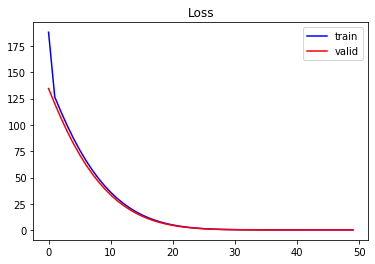

In [52]:
# 視覺化訓練過程
plt.plot(model_history.history['loss'], 'b', label='train')
plt.plot(model_history.history['val_loss'], 'r', label='valid')
plt.legend()
plt.title('Loss')
plt.show()

In [53]:
test_data = pd.read_csv('test_one_hot.csv')
test_id = test_data['Id']
test_data = test_data[test_data.columns[2:]]

In [54]:
test_data.shape

(1459, 313)

In [55]:
x_test = test_data.values
scale = StandardScaler()
x_test = scale.fit_transform(x_test)

In [56]:
x_test

array([[ 0.55429761,  0.5617868 , -0.75110125, ...,  1.41712647,
        -0.43260146, -0.20346744],
       [ 0.56220478,  0.97040722, -0.05487716, ..., -0.70565332,
         2.31159647, -0.20346744],
       [ 0.50470189,  0.90841301, -0.75110125, ..., -0.70565332,
        -0.43260146, -0.20346744],
       ...,
       [ 0.99698955,  1.64355062, -0.75110125, ...,  1.41712647,
        -0.43260146, -0.20346744],
       [ 0.392344  ,  0.34824312, -0.75110125, ..., -0.70565332,
        -0.43260146, -0.20346744],
       [ 0.50470189,  0.18649441,  0.64134693, ..., -0.70565332,
        -0.43260146, -0.20346744]])

In [57]:
prediction = model.predict(x_test)

In [58]:
prediction

array([[12.014452],
       [11.935219],
       [12.014452],
       ...,
       [11.989142],
       [12.006555],
       [12.014452]], dtype=float32)

In [59]:
predict_price = np.expm1(prediction)

In [60]:
predict_price

array([[165123.  ],
       [152544.6 ],
       [165123.  ],
       ...,
       [160996.23],
       [163824.1 ],
       [165123.  ]], dtype=float32)

In [61]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = predict_price

In [62]:
submission.to_csv('submission.csv', index=False)

In [ ]:
#import tensorflow.keras.backend as K
#from sklearn.ensemble import StackingRegressor
#from sklearn.metrics import mean_absolute_error
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression
#from scikeras.wrappers import KerasRegressor
#import pickle
#import xgboost
#import lightgbm

In [ ]:
#def create_model():
#   model = keras.Sequential()
#    model.add(layers.Dense(32, activation='relu',
#                          input_shape=(x_train.shape[1],)))
#    model.add(layers.Dense(16,activation='relu'))
#    model.add(layers.Dense(4,activation='relu'))
#    model.add(layers.Dense(1, activation='linear'))
#    model.compile(loss='mean_absolute_error',
#                  optimizer=keras.optimizers.Adam(learning_rate=0.01),
#                  metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae"])
#    return model

In [ ]:
#dnn_model = KerasRegressor(build_fn=create_model, nb_epoch=50, batch_size=32)
#estimators = [('Ridge', linear_model.Ridge()), ('dnn', dnn_model)]
#final_model = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())
#final_model.fit(x_train, y_train)
#print(f"mae score{mean_absolute_error(final_model.predict(x_valid), y_valid)}")

In [ ]:
#dnn_model = KerasRegressor(build_fn=create_model, nb_epoch=50, batch_size=32)
#estimators = [('Ridge', linear_model.Ridge()), ('dnn', dnn_model)]
#final_model = StackingRegressor(estimators = estimators, final_estimator = LinearRegression())
#final_model.fit(x_train, y_train)
#print(f"mae score{mean_absolute_error(final_model.predict(x_valid), y_valid)}")
#testpredict = final_model.predict(x_test)
#predict_price1 = np.expm1(testpredict)
#solution = pd.DataFrame()
#solution['Id'] = test_id
#solution['SalePrice'] = predict_price1
#submission.to_csv('submission.csv', index=False)

In [ ]:
#predict_price1

In [ ]:
kaggle最高分: 0.40133